bookID: Nomor identifikasi unik dari setiap buku

judul: Nama di mana buku itu diterbitkan

penulis: Nama penulis buku

average_rating: Peringkat rata-rata buku yang diterima secara total.

isbn : Nomor buku berstandar internasional

isbn13: 13 digit isbn untuk mengidentifikasi buku

language_code: Bahasa Utama buku

num_pages: Jumlah halaman isi buku

Rating_count: Jumlah total rating yang diterima buku.

text_reviews_count: Jumlah total ulasan tertulis yang diterima.

publish_date: Tanggal saat buku pertama kali diterbitkan

penerbit: Nama Pulishers

In [1]:
import pandas as pd
import numpy as np

# for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# for interactive plots
import ipywidgets
from ipywidgets import interact
from ipywidgets import interact_manual

In [2]:
df = pd.read_csv("books.csv", error_bad_lines = False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [3]:
#Menampilkan data
df.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [4]:
#dimensi (jumlah baris dan kolom) dari suatu DataFrame
df.shape

(11123, 12)

In [5]:
#daftar kolom (nama kolom)
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [6]:
#menghapus spasi
df.columns = df.columns.str.strip()

In [7]:
#daftar kolom (nama kolom)
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [8]:
#tipe data
df.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

In [9]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [10]:
#kolom-kolom objek (non-numerik) 
df.describe(include = 'object')

,title,authors,isbn,language_code,publication_date,publisher
count,11123,11123,11123,11123,11123,11123
unique,10348,6639,11123,27,3679,2290
top,The Iliad,P.G. Wodehouse,0670030775,eng,10/1/2005,Vintage
freq,9,40,1,8908,56,318


In [11]:
#mengecek apakah data kosong
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [12]:
#memeriksa apakah ada baris duplikat dalam DataFrame
df.duplicated().any()

False

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7   num_pages           11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


# Feature Engineering

- Ekstrak Fitur Penting
- Mengurangi ukuran Fitur
- Membuat fitur baru dari yang sudah ada

In [14]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [15]:
#menghitung jumlah nilai unik dalam kolom "isbn" 
df.isbn.nunique()

11123

In [16]:
#menghitung jumlah nilai unik dalam kolom "isbn13" 
df.isbn13.nunique()

11123

In [17]:
# menghapus kolom 'bookID', 'isbn', dan 'isbn13
df.drop(['bookID', 'isbn', 'isbn13'], axis = 1, inplace = True)

In [18]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher'],
      dtype='object')

In [19]:
df.publication_date

0         9/16/2006
1          9/1/2004
2         11/1/2003
3          5/1/2004
4         9/13/2004
            ...    
11118    12/21/2004
11119     12/1/1988
11120      8/1/1993
11121     2/27/2007
11122     5/28/2006
Name: publication_date, Length: 11123, dtype: object

In [20]:
#Membuat kolom baru dengan nama year
df['year'] = df['publication_date'].str.split('/')
df['year'] = df['year'].apply(lambda x: x[2])

In [21]:
df.head(2)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004


In [22]:
df.dtypes

title                  object
authors                object
average_rating        float64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
year                   object
dtype: object

In [23]:
#mengubah tipe data dalam kolom year 
df['year'] = df['year'].astype('int')

In [24]:
df.dtypes

title                  object
authors                object
average_rating        float64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
year                    int32
dtype: object

In [25]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year'],
      dtype='object')

In [26]:
# nilai minimum (tahun terkecil) dalam kolom "year"
df['year'].min()

1900

In [27]:
df['year'].max()

2020

In [28]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year'],
      dtype='object')

# Exploratary Data Analysis

In [29]:
#pemfilteran pada data pada tahun 2020
df[df['year'] == 2020][['title', 'authors','average_rating','language_code','publisher' ]]

,title,authors,average_rating,language_code,publisher
9664,A Quick Bite (Argeneau #1),Lynsay Sands,3.91,eng,Avon


In [30]:
#menghitung beberapa title berdasarkan nilai tiap tahun
df.groupby(['year'])['title'].agg('count').sort_values(ascending = False).head(20)

year
2006    1700
2005    1260
2004    1069
2003     931
2002     798
2001     656
2000     534
2007     518
1999     450
1998     396
1997     290
1996     250
1995     249
1994     220
1992     183
1993     165
1991     151
1989     118
1990     117
1987      88
Name: title, dtype: int64

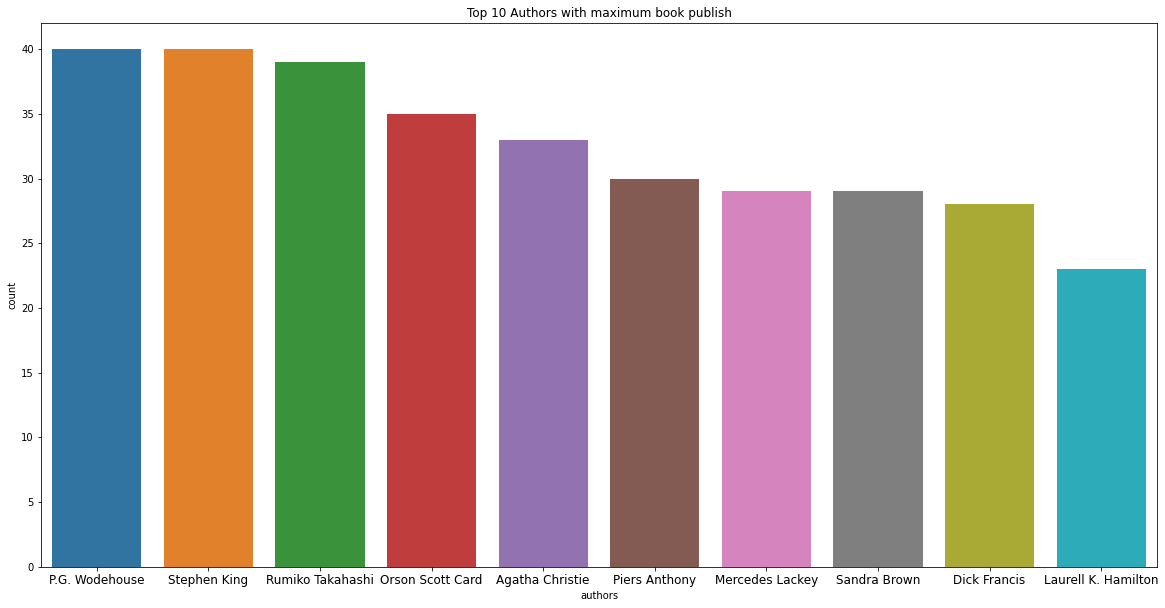

In [31]:
plt.figure(figsize = (20, 10))
sns.countplot(x = 'authors', data = df,
             order = df['authors'].value_counts().iloc[:10].index)
plt.title("Top 10 Authors with maximum book publish")
plt.xticks(fontsize = 12)
plt.show()

In [32]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year'],
      dtype='object')

In [33]:
# menghitung jumlah kemunculan setiap nilai dalam kolom "language_code" 
df.language_code.value_counts()

eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
tur         1
ara         1
wel         1
srp         1
msa         1
glg         1
gla         1
nor         1
ale         1
nl          1
Name: language_code, dtype: int64

In [34]:
# pengelompokan berdasarkan kolom "language_code" dan menghitung nilai rata-rata dari kolom "average_rating", 
#"ratings_count", dan "text_reviews_count" untuk setiap kelompok bahasa
df.groupby(['language_code'])[['average_rating', 
                               'ratings_count', 
                               'text_reviews_count']].agg('mean').style.background_gradient(cmap = 'Wistia')


,average_rating,ratings_count,text_reviews_count
language_code,,,
ale,4.360000,102.000000,16.000000
ara,3.550000,122.000000,12.000000
en-CA,4.025714,4086.714286,324.428571
en-GB,3.923411,2463.691589,104.060748
en-US,3.914659,3773.906960,160.357244
eng,3.934062,21570.272564,645.156601
enm,3.873333,3233.666667,84.000000
fre,3.971528,3277.319444,64.513889
ger,3.950101,234.727273,8.232323


In [35]:
#menghitung jumlah kemunculan setiap judul buku (kolom "title")
book = df['title'].value_counts()[:20]
book

The Iliad                     9
The Brothers Karamazov        9
The Odyssey                   8
Gulliver's Travels            8
'Salem's Lot                  8
Anna Karenina                 8
A Midsummer Night's Dream     7
The Picture of Dorian Gray    7
Macbeth                       6
The Secret Garden             6
Jane Eyre                     6
Sense and Sensibility         6
Treasure Island               6
The Histories                 6
The Great Gatsby              6
Romeo and Juliet              6
Robinson Crusoe               6
The Scarlet Letter            6
Collected Stories             6
King Lear                     5
Name: title, dtype: int64

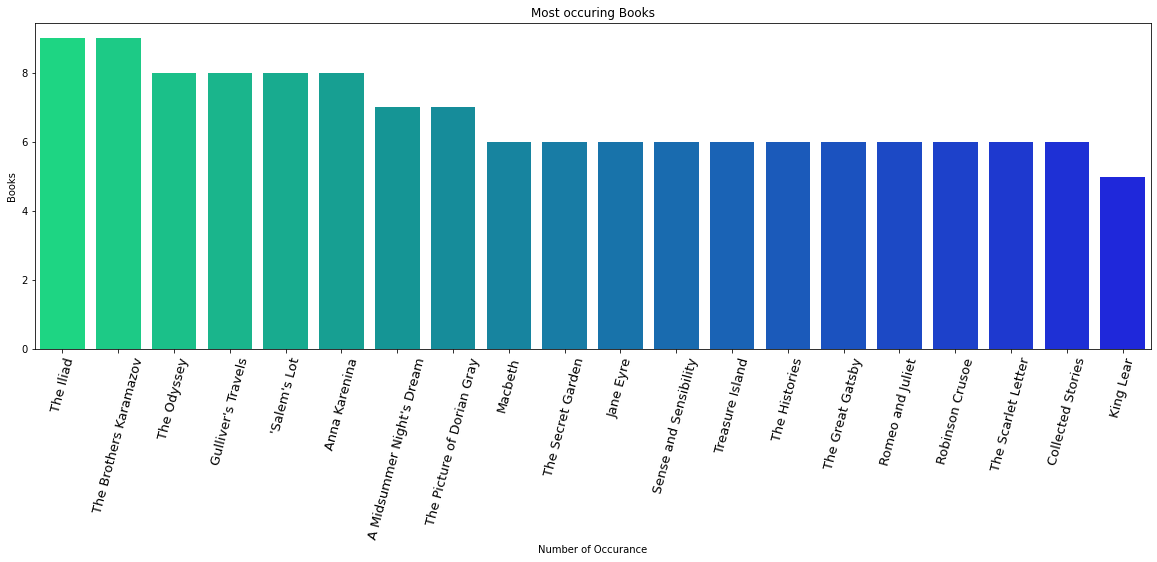

In [36]:
# untuk menemukan buku yang paling banyak muncul 
plt.figure(figsize = (20, 6))
book = df['title'].value_counts()[:20]
sns.barplot(x = book.index, y = book,
           palette = 'winter_r')
plt.title("Most occuring Books")
plt.xlabel("Number of Occurance")
plt.ylabel("Books")
plt.xticks(rotation = 75, fontsize = 13)
plt.show()

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


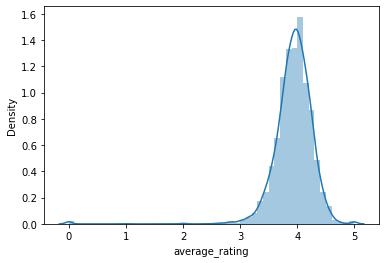

In [37]:
sns.distplot(df['average_rating'])
plt.show()

In [38]:
#mengambil baris yang memiliki nilai tertinggi dalam kolom "average_rating"
df[df.average_rating == df.average_rating.max()][['title','authors','language_code','publisher']]

,title,authors,language_code,publisher
624,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,grc,Oxford University Press USA
786,Willem de Kooning: Late Paintings,Julie Sylvester/David Sylvester,eng,Schirmer Mosel
855,Literature Circle Guide: Bridge to Terabithia:...,Tara MacCarthy,eng,Teaching Resources
1243,Middlesex Borough (Images of America: New Jersey),Middlesex Borough Heritage Committee,eng,Arcadia Publishing
4125,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,eng,BradyGames
4788,The Diamond Color Meditation: Color Pathway to...,John Diamond,eng,Square One Publishers
4933,Bulgakov's the Master and Margarita: The Text ...,Elena N. Mahlow,eng,Vantage Press
5023,The Complete Theory Fun Factory: Music Theory ...,Ian Martin/Katie Elliott,eng,Boosey & Hawkes Inc
5474,The Goon Show Volume 4: My Knees Have Fallen ...,NOT A BOOK,eng,BBC Physical Audio
5476,The Goon Show Volume 11: He's Fallen in the W...,NOT A BOOK,eng,BBC Physical Audio


In [39]:
# menghitung jumlah kemunculan setiap nilai dalam kolom "publisher"
publisher = df['publisher'].value_counts()[:20]
publisher

Vintage                         318
Penguin Books                   261
Penguin Classics                184
Mariner Books                   150
Ballantine Books                144
HarperCollins                   112
Harper Perennial                112
Pocket Books                    111
Bantam                          110
VIZ Media LLC                    88
Berkley                          86
Dover Publications               85
Modern Library                   82
Del Rey                          80
Tor Books                        76
Grand Central Publishing         76
Oxford University Press  USA     75
Oxford University Press          73
Scribner                         73
W. W. Norton  Company            68
Name: publisher, dtype: int64

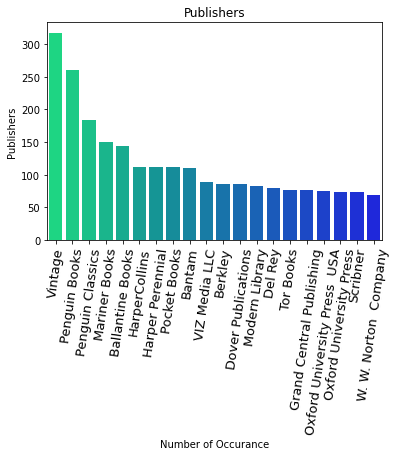

In [40]:
# menampilkan 20 penerbit dengan jumlah kemunculan terbanyak 
publisher = df['publisher'].value_counts()[:20]
sns.barplot(x = publisher.index, y = publisher, palette = 'winter_r')
plt.title("Publishers")
plt.xlabel("Number of Occurance")
plt.ylabel("Publishers")
plt.xticks(rotation = 82, fontsize = 13)
plt.show()

### Recommending Books based on Publishers
### Recommending Books based on Authors
### Recommending Books based on Language

In [41]:
#menghitung jumlah kemunculan setiap nilai dalam kolom "publisher" 
df.publisher.value_counts()

Vintage                      318
Penguin Books                261
Penguin Classics             184
Mariner Books                150
Ballantine Books             144
                            ... 
Adamant Media Corporation      1
K.G. Saur Verlag               1
Nonpareil Books                1
Image                          1
HarperCollins Perennial        1
Name: publisher, Length: 2290, dtype: int64

In [42]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year'],
      dtype='object')

In [43]:
#menampilkan 10 buku dengan rating rata-rata tertinggi dari penerbit
def recomd_books_publisheres(x):
    a = df[df['publisher'] == x][['title', 'average_rating']]
    a = a.sort_values(by = 'average_rating', ascending = False)
    return a.head(10)

In [44]:
# memberikan rekomendasi buku dari penerbit "Vintage" berdasarkan rating rata-rata
recomd_books_publisheres('Vintage')

,title,average_rating
7371,Remembrance of Things Past: Volume II - The Gu...,4.53
335,The Power Broker: Robert Moses and the Fall of...,4.51
10838,The Civil War Vol. 1: Fort Sumter to Perryville,4.42
1775,The Son Avenger (The Master of Hestviken #4),4.40
1505,A Fine Balance,4.36
9626,Nobody Knows My Name,4.35
2267,The Stories of Vladimir Nabokov,4.30
3112,All of Us: The Collected Poems,4.30
8787,Selected Stories,4.28
4019,Selected Stories,4.28


In [45]:
# memberikan rekomendasi buku dari penerbit "Penguin books" berdasarkan rating rata-rata
recomd_books_publisheres('Penguin Books')

,title,average_rating
4244,The Complete Maus,4.55
5564,The Penguin Companion to European Literature,4.50
1381,Before The Mayflower A History of Black America,4.44
4602,Selected Non-Fictions,4.43
3011,The Read-Aloud Handbook,4.41
4551,Life With Jeeves (Jeeves #6 2 & 4),4.39
1275,East of Eden,4.37
3304,Ludwig Wittgenstein: The Duty of Genius,4.36
4980,Life at Blandings,4.35
10867,The Portable Dorothy Parker,4.34


In [46]:
# dropdown menu yang berisi daftar penerbit
@interact
def recomd_books_publishers(publisher_name = list(df['publisher'].value_counts().index)):
    a = df[df['publisher'] == publisher_name][['title', 'average_rating']]
    a = a.sort_values(by = 'average_rating', ascending = False)
    return a.head(10)

interactive(children=(Dropdown(description='publisher_name', options=('Vintage', 'Penguin Books', 'Penguin Cla…

In [47]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year'],
      dtype='object')

# based upon Authors

In [48]:
@interact
def recomd_books_authors(authors_name = list(df['authors'].value_counts().index)):
    a = df[df['authors'] == authors_name][['title', 'average_rating']]
    a = a.sort_values(by = 'average_rating', ascending = False)
    return a.head(10)

interactive(children=(Dropdown(description='authors_name', options=('P.G. Wodehouse', 'Stephen King', 'Rumiko …

In [49]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year'],
      dtype='object')

In [50]:
@interact
def recomd_books_lang(language = list(df['language_code'].value_counts().index)):
    a = df[df['language_code'] == language][['title', 'average_rating']]
    a = a.sort_values(by = 'average_rating', ascending = False)
    return a.head(10)

interactive(children=(Dropdown(description='language', options=('eng', 'en-US', 'spa', 'en-GB', 'fre', 'ger', …

# Data Preprocessing

In [51]:
df.head(2)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004


In [52]:
def num_to_obj(x):
    if x >0 and x <=1:
        return "between 0 and 1"
    if x > 1 and x <= 2:
        return "between 1 and 2"
    if x > 2 and x <=3:
        return "between 2 and 3"
    if x >3 and x<=4:
        return "between 3 and 4"
    if x >4 and x<=5:
        return "between 4 and 5"
df['rating_obj'] = df['average_rating'].apply(num_to_obj)

In [53]:
df['rating_obj'].value_counts()

between 3 and 4    6285
between 4 and 5    4735
between 2 and 3      69
between 1 and 2       7
between 0 and 1       2
Name: rating_obj, dtype: int64

In [54]:
rating_df = pd.get_dummies(df['rating_obj'])
rating_df.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [55]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year', 'rating_obj'],
      dtype='object')

In [56]:
language_df = pd.get_dummies(df['language_code'])
language_df.head()

,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,...,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
features = pd.concat([rating_df,language_df, df['average_rating'],
                    df['ratings_count'], df['title']], axis = 1)
features.set_index('title', inplace= True)
features.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5,ale,ara,en-CA,en-GB,en-US,...,por,rus,spa,srp,swe,tur,wel,zho,average_rating,ratings_count
title,,,,,,,,,,,,,,,,,,,,,
Harry Potter and the Half-Blood Prince (Harry Potter #6),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.57,2095690
Harry Potter and the Order of the Phoenix (Harry Potter #5),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.49,2153167
Harry Potter and the Chamber of Secrets (Harry Potter #2),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.42,6333
Harry Potter and the Prisoner of Azkaban (Harry Potter #3),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.56,2339585
Harry Potter Boxed Set Books 1-5 (Harry Potter #1-5),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.78,41428


In [58]:
from sklearn.preprocessing import MinMaxScaler 

In [59]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

In [60]:
features_scaled

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.14000000e-01, 4.55816060e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.98000000e-01, 4.68317403e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.84000000e-01, 1.37743803e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.92000000e-01, 1.78351363e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.44000000e-01, 1.67258779e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.82000000e-01, 2.45776879e-05]])

# Model Building

In [61]:
from sklearn import neighbors

In [62]:
model = neighbors.NearestNeighbors(n_neighbors=5, algorithm = 'ball_tree',
                                  metric = 'euclidean')
model.fit(features_scaled)
dist, idlist = model.kneighbors(features_scaled)

In [63]:
df['title'].value_counts()

The Iliad                                                                     9
The Brothers Karamazov                                                        9
The Odyssey                                                                   8
Gulliver's Travels                                                            8
'Salem's Lot                                                                  8
                                                                             ..
Real Ultimate Power: The Official Ninja Book                                  1
The War of Art: Break Through the Blocks & Win Your Inner Creative Battles    1
Introducing Camus                                                             1
People of the Lie: The Hope for Healing Human Evil                            1
Odes to Common Things                                                         1
Name: title, Length: 10348, dtype: int64

In [64]:
@interact
def BookRecommender(book_name=list(df['title'].value_counts().index)):
    book_list_name = []
    book_id = df[df['title'] == book_name].index[0]
    for newid in idlist[book_id]:
        book_list_name.append(df.iloc[newid].title)
    return book_list_name

interactive(children=(Dropdown(description='book_name', options=('The Iliad', 'The Brothers Karamazov', 'The O…

In [65]:
import pickle
data_to_save = {
    'features_scaled': features_scaled,
    'dist': dist,
    'idlist': idlist
}

# Menyimpan data dalam file menggunakan pickle
with open('model_data.pkl', 'wb') as file:
    pickle.dump(data_to_save, file)

In [66]:
import joblib

# Load the Python model
python_model = joblib.load('model_data.pkl')

# Save the Python model in Java-readable format
joblib.dump(python_model, 'model.knn')


['model.knn']